

> Blok alıntı ekle



# **illere gore trafik kaza olu ve yarali **



In [ ]:
import pandas as pd
from google.colab import files



df_raw = pd.read_excel("illere gore trafik kaza olu ve yarali sayisi.xls", header=None)
pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)
df_raw.head(30)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,"İllere göre trafik kaza, ölü ve yaralı sayısı, 2024",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"Number of traffic accidents, persons killed and injured by province, 2024",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,Toplam motorlu kara taşıtı sayısı \nTotal number of road motor vehicles,Ölümlü yaralanmalı kaza sayısı \nNumber of accidents involving death or injury,Ölü sayısı - Number of persons killed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Toplam motorlu kara taşıtı sayısı \nTotal number of road motor vehicles,Ölümlü yaralanmalı kaza sayısı \nNumber of accidents involving death or injury,Ölü sayısı - Number of persons killed,NaN,NaN,NaN,NaN,NaN
3,İl\nProvince,Toplam kaza sayısı (1) \n Total number of accidents(1),NaN,NaN,Toplam\nTotal,Kaza yerinde\nAt accident scene,Kaza sonrası(2) Accident follow-up(2),Yaralı sayısı Number of persons injured,NaN,NaN,İl\nProvince,Toplam kaza sayısı (1) \n Total number of accidents(1),NaN,NaN,Toplam\nTotal,Kaza yerinde \nAt accident scene,Kaza sonrası(2) Accident follow-up(2),Yaralı sayısı Number of persons injured,NaN,NaN
4,Toplam-Total,1444027,31301389,266855,6352,2713,3639,385117,NaN,NaN,Kırşehir,2806,83991,806,18,3,15,1241,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Kocaeli,45454,580110,6688,127,29,98,8931,NaN,NaN
6,Adana,32431,896419,6784,218,91,127,9696,NaN,NaN,Konya,40136,928837,8566,300,115,185,12750,NaN,NaN
7,Adıyaman,5139,151123,2227,56,20,36,3441,NaN,NaN,Kütahya,6657,264345,1840,73,24,49,2745,NaN,NaN
8,Afyonkarahisar,9131,295788,2682,127,25,102,4745,NaN,NaN,Malatya,11006,234471,2547,94,35,59,4184,NaN,NaN
9,Ağrı,2182,34565,806,19,3,16,1511,NaN,NaN,Manisa,19752,789697,5961,147,78,69,8784,NaN,NaN


In [ ]:
# Gerekli kütüphaneler
import pandas as pd
from google.colab import files
# 2️⃣ Ham veriyi başlıksız olarak oku (ilk 4 satır başlık karmaşası)
df_raw = pd.read_excel("illere gore trafik kaza olu ve yarali sayisi.xls", header=None)
# 3️⃣ Veri kısmı 5. satırdan (index=4) itibaren başlıyor
df_data = df_raw.iloc[4:].reset_index(drop=True)
# 4️⃣ Sol blok (0-7 arası sütunlar)
left = df_data.iloc[:, 0:8]
left.columns = ["İl", "Toplam Kaza", "Araç Sayısı", "ÖY Kaza", "Ölü (Toplam)", "Ölü (Yerde)", "Ölü (Sonrası)", "Yaralı"]
# 5️⃣ Sağ blok (10-17 arası sütunlar)
right = df_data.iloc[:, 10:18]
right.columns = ["İl", "Toplam Kaza", "Araç Sayısı", "ÖY Kaza", "Ölü (Toplam)", "Ölü (Yerde)", "Ölü (Sonrası)", "Yaralı"]
# 6️⃣ Birleştir
df_clean = pd.concat([left, right], axis=0)
# 7️⃣ Gereksiz satırları temizle
df_clean = df_clean[df_clean["İl"].notna()]  # NaN satırları at
df_clean = df_clean[~df_clean["İl"].str.contains("Toplam|TÜİK|TurkStat|kaza|accident|trafik", case=False, na=False)]
df_clean.reset_index(drop=True, inplace=True)

# 8️⃣ Yıl bilgisi ekle
df_clean["Yıl"] = 2024
# 9️⃣ Sayısal veri dönüşümü
for col in ["Toplam Kaza", "Araç Sayısı", "ÖY Kaza", "Ölü (Toplam)", "Ölü (Yerde)", "Ölü (Sonrası)", "Yaralı"]:
    df_clean[col] = pd.to_numeric(df_clean[col], errors="coerce")
# ✅ Temiz veri hazır
df_clean.head(10)
import pandas as pd
# Satır ve sütun gösterim limitlerini kaldır
pd.set_option('display.max_rows', None)        # Tüm satırları göster
pd.set_option('display.max_columns', None)     # Tüm sütunları göster
pd.set_option('display.width', None)           # Satır genişliğini sınırsız yap
pd.set_option('display.max_colwidth', None)    # Hücredeki maksimum karakter sınırını kaldır

# Veri çerçevesini çağırarak terminalde tam görüntü al
df_clean



,İl,Toplam Kaza,Araç Sayısı,ÖY Kaza,Ölü (Toplam),Ölü (Yerde),Ölü (Sonrası),Yaralı,Yıl
0,Adana,32431,896419,6784,218,91,127,9696,2024
1,Adıyaman,5139,151123,2227,56,20,36,3441,2024
2,Afyonkarahisar,9131,295788,2682,127,25,102,4745,2024
3,Ağrı,2182,34565,806,19,3,16,1511,2024
4,Amasya,4937,153419,1541,42,18,24,2422,2024
5,Ankara,164669,2783571,16584,325,167,158,22895,2024
6,Antalya,58778,1571626,13401,290,116,174,18048,2024
7,Artvin,1536,47479,364,15,10,5,560,2024
8,Aydın,17537,624709,5426,137,65,72,7444,2024
9,Balıkesir,20523,641764,5753,167,82,85,8167,2024


# **Keşifsel veri analizi**

<ipython-input-36-751d20a9ca36>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_kaza, x="Toplam Kaza", y="İl", palette="Reds_r")


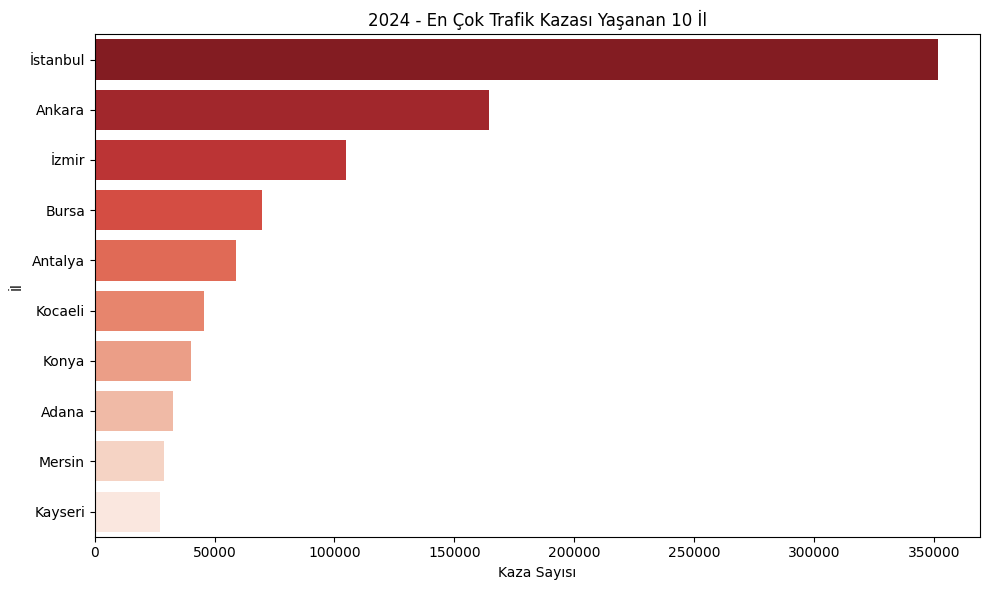

<ipython-input-36-751d20a9ca36>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_olu, x="Ölü (Toplam)", y="İl", palette="Blues_r")


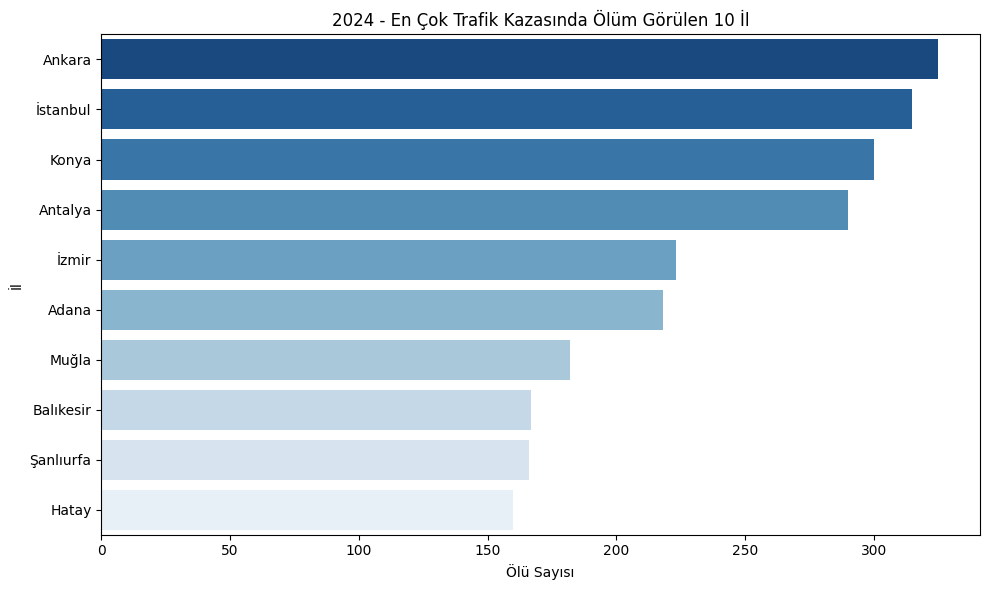

<ipython-input-36-751d20a9ca36>:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_olum_orani, x="Ölüm Oranı (%)", y="İl", palette="Oranges_r")


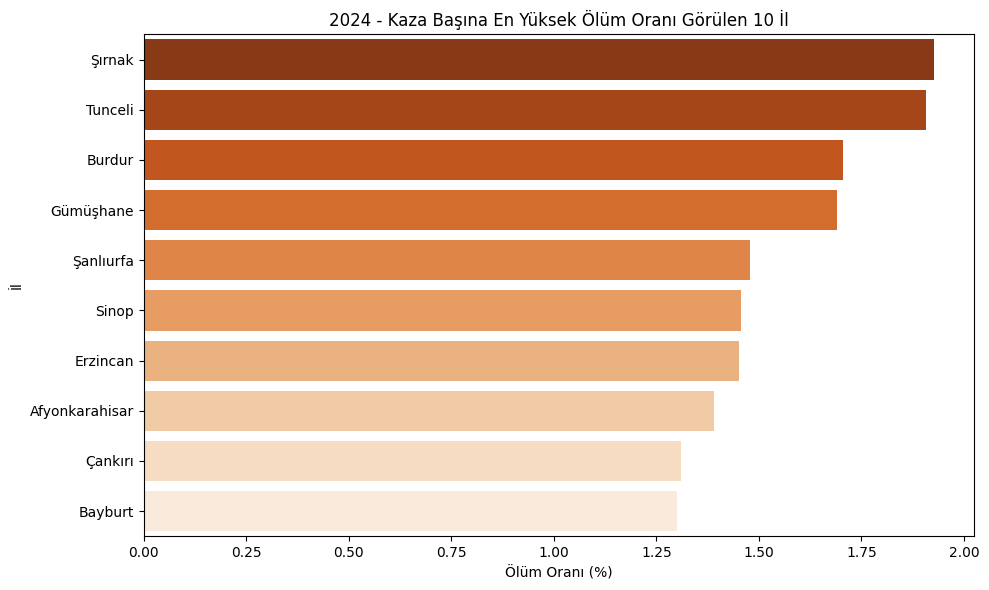

<ipython-input-36-751d20a9ca36>:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_yarali_orani, x="Yaralı Oranı (%)", y="İl", palette="Greens_r")


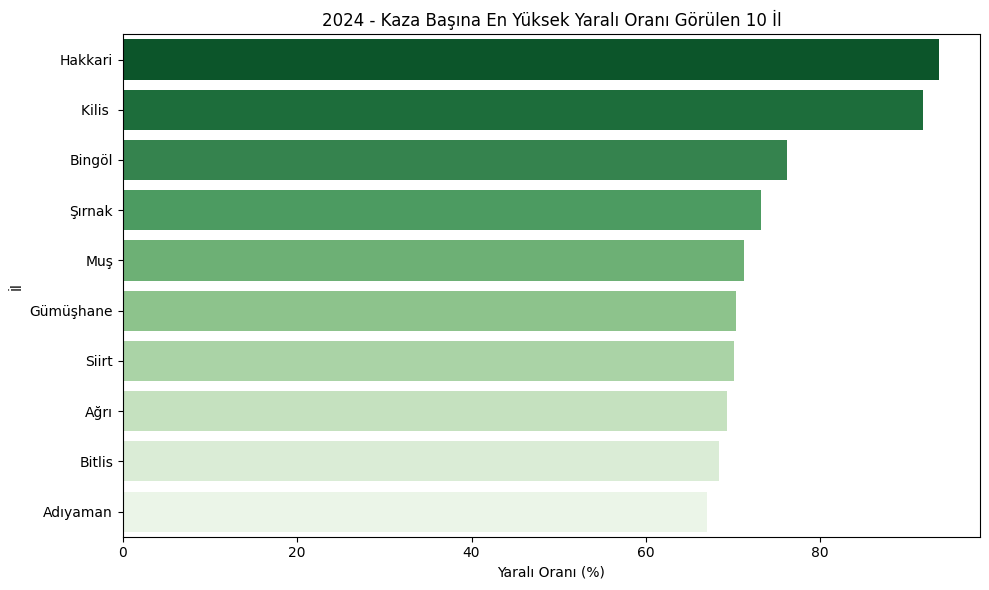

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1️⃣ En çok trafik kazası yaşanan 10 il
top_kaza = df_clean.sort_values("Toplam Kaza", ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(data=top_kaza, x="Toplam Kaza", y="İl", palette="Reds_r")
plt.title("2024 - En Çok Trafik Kazası Yaşanan 10 İl")
plt.xlabel("Kaza Sayısı")
plt.ylabel("İl")
plt.tight_layout()
plt.show()

# 2️⃣ En çok ölü sayısı görülen 10 il
top_olu = df_clean.sort_values("Ölü (Toplam)", ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(data=top_olu, x="Ölü (Toplam)", y="İl", palette="Blues_r")
plt.title("2024 - En Çok Trafik Kazasında Ölüm Görülen 10 İl")
plt.xlabel("Ölü Sayısı")
plt.ylabel("İl")
plt.tight_layout()
plt.show()

# 3️⃣ Kaza başına ölü ve yaralı oranları (oran sütunları ekleyelim)
df_clean["Ölüm Oranı (%)"] = (df_clean["Ölü (Toplam)"] / df_clean["Toplam Kaza"]) * 100
df_clean["Yaralı Oranı (%)"] = (df_clean["Yaralı"] / df_clean["Toplam Kaza"]) * 100

# 4️⃣ Ölüm oranına göre ilk 10 il
top_olum_orani = df_clean.sort_values("Ölüm Oranı (%)", ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(data=top_olum_orani, x="Ölüm Oranı (%)", y="İl", palette="Oranges_r")
plt.title("2024 - Kaza Başına En Yüksek Ölüm Oranı Görülen 10 İl")
plt.xlabel("Ölüm Oranı (%)")
plt.ylabel("İl")
plt.tight_layout()
plt.show()

# 5️⃣ Kaza başına yaralanma oranı en yüksek 10 il
top_yarali_orani = df_clean.sort_values("Yaralı Oranı (%)", ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(data=top_yarali_orani, x="Yaralı Oranı (%)", y="İl", palette="Greens_r")
plt.title("2024 - Kaza Başına En Yüksek Yaralı Oranı Görülen 10 İl")
plt.xlabel("Yaralı Oranı (%)")
plt.ylabel("İl")
plt.tight_layout()
plt.show()


# ** olumlu yaralanmali kazaya neden olan kusurlar**

In [ ]:
import pandas as pd
from google.colab import files



df_raw = pd.read_excel("olumlu yaralanmali kazaya neden olan kusurlar.xls", header=None)
pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)
df_raw.head(30)


,0,1,2
0,"Ölümlü yaralanmalı kazaya neden olan kusurlar, 2024",NaN,NaN
1,"Faults causing road traffic accidents involving death or injury, 2024",NaN,NaN
2,Kusurlar,NaN,Toplam
3,Faults,NaN,Total
4,NaN,NaN,NaN
5,Toplam - Total,NaN,318926
6,Sürücü kusurları - Driver faults,NaN,287234
7,NaN,Alkollü araç kullanmak,NaN
8,NaN,Drunk driving,1934
9,NaN,"Araç hızını yol, hava ve trafiğin gerektirdiği şartlara uydurmamak",NaN


In [ ]:
import pandas as pd
from google.colab import files


# 2. Excel dosyasını başlıksız oku
df_raw = pd.read_excel("olumlu yaralanmali kazaya neden olan kusurlar.xls", header=None)

# 3. Gereksiz ilk satırları at (örnek 5 satır)
df_data = df_raw.iloc[5:].reset_index(drop=True)

# 4. Sütunları isimlendir
df_data.columns = ["Ana Kusur", "Alt Kusur", "Ölüm Sayısı"]

# 5. "Ölüm Sayısı" sütunundaki NaNları ileri doldur, sayısala çevir
df_data["Ölüm Sayısı"] = df_data["Ölüm Sayısı"].ffill()
df_data["Ölüm Sayısı"] = pd.to_numeric(df_data["Ölüm Sayısı"], errors='coerce')

# 6. Ana Kusur sütunundaki boşlukları ileri ve geri doldur
df_data["Ana Kusur"] = df_data["Ana Kusur"].ffill()
df_data["Ana Kusur"] = df_data["Ana Kusur"].bfill()

# 7. Anlamlı satırları seç (Alt Kusur boş olmayanlar)
df_data = df_data[df_data["Alt Kusur"].notna()]

# 8. İndeksi sıfırla
df_data.reset_index(drop=True, inplace=True)

# 9. Sonucu göster (İstersen daha fazla satır görmek için parametreyi değiştir)
df_data.head(98)


<ipython-input-60-bbb0c32df4fb>:15: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_data["Ölüm Sayısı"] = df_data["Ölüm Sayısı"].ffill()


,Ana Kusur,Alt Kusur,Ölüm Sayısı
0,Sürücü kusurları - Driver faults,Alkollü araç kullanmak,287234
1,Sürücü kusurları - Driver faults,Drunk driving,1934
2,Sürücü kusurları - Driver faults,"Araç hızını yol, hava ve trafiğin gerektirdiği şartlara uydurmamak",1934
3,Sürücü kusurları - Driver faults,"Not adjusting the vehicle speed to road, weather and traffic conditions",105802
4,Sürücü kusurları - Driver faults,Arkadan çarpmak,105802
5,Sürücü kusurları - Driver faults,Crashing from back,26420
6,Sürücü kusurları - Driver faults,Aşırı hızla araç kullanmak,26420
7,Sürücü kusurları - Driver faults,Driving overspeed,2198
8,Sürücü kusurları - Driver faults,Doğrultu değiştirme (dönüş) kurallarına uymamak,2198
9,Sürücü kusurları - Driver faults,Violating direction changing (turning) rules,24353


# **Keşifsel veri analizi**

<ipython-input-61-d41714854122>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=ana_kusur_toplam, x="Ölüm Sayısı", y="Ana Kusur", palette="Reds_r")


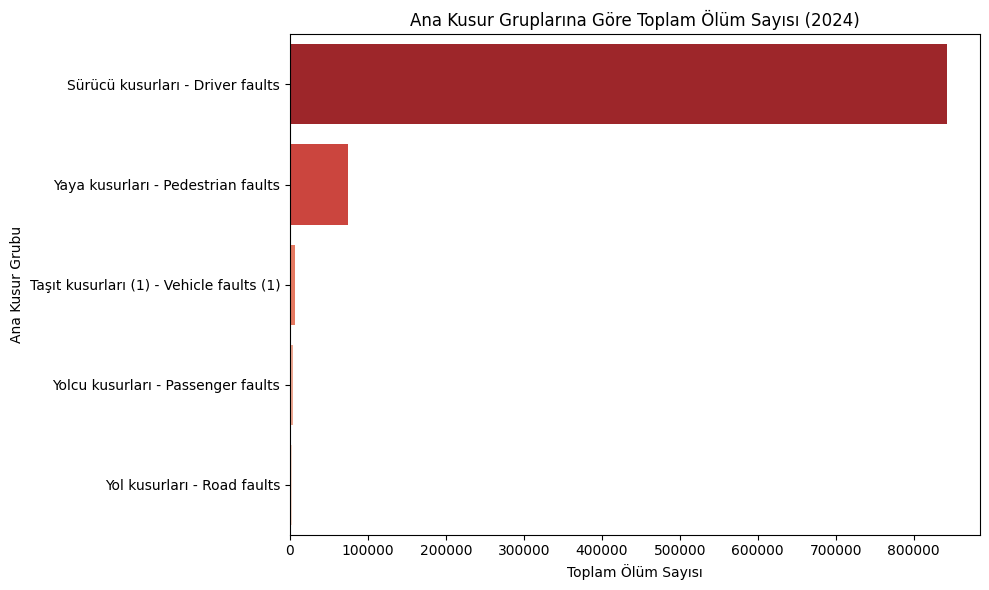

<ipython-input-61-d41714854122>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=alt_kusur_top20, y="Alt Kusur", x="Ölüm Sayısı", palette="mako")


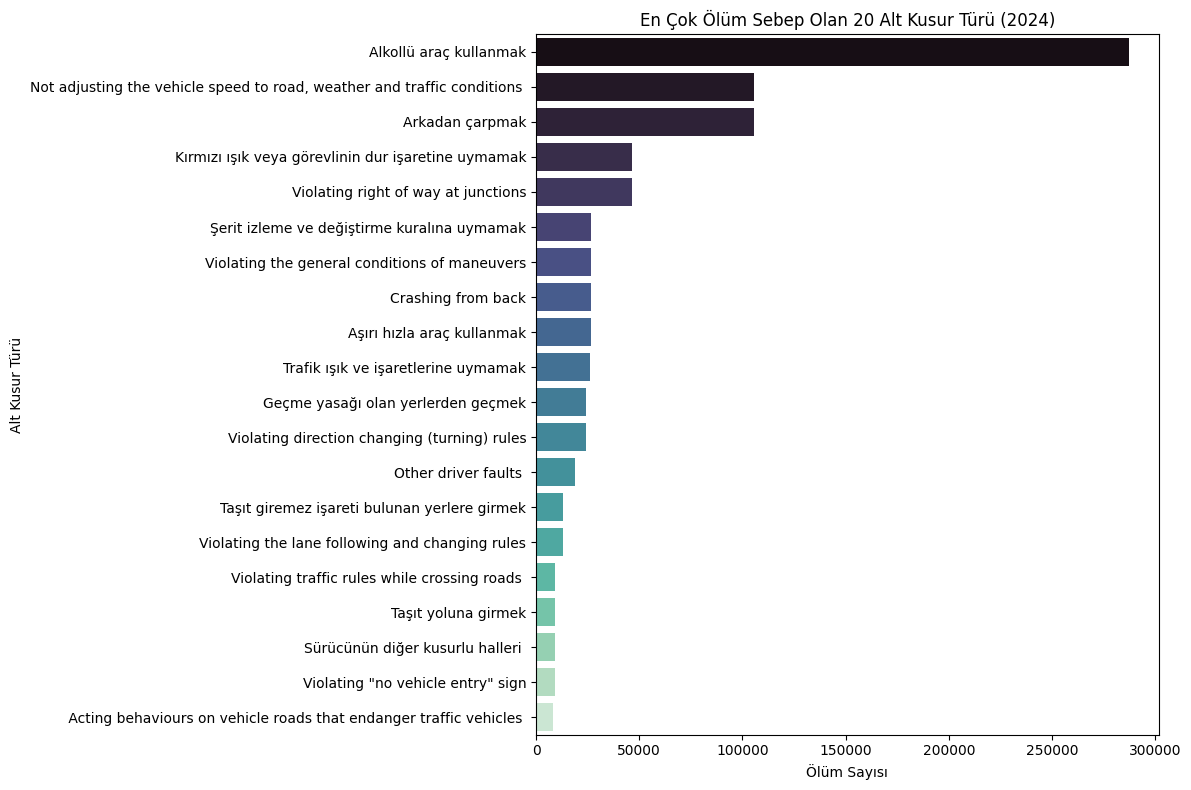

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Ana kusur gruplarına göre toplam ölüm sayısı
ana_kusur_toplam = df_data.groupby("Ana Kusur")["Ölüm Sayısı"].sum().sort_values(ascending=False).reset_index()

plt.figure(figsize=(10,6))
sns.barplot(data=ana_kusur_toplam, x="Ölüm Sayısı", y="Ana Kusur", palette="Reds_r")
plt.title("Ana Kusur Gruplarına Göre Toplam Ölüm Sayısı (2024)")
plt.xlabel("Toplam Ölüm Sayısı")
plt.ylabel("Ana Kusur Grubu")
plt.tight_layout()
plt.show()

# 2. İlk 20 Alt Kusur Türüne Göre Ölüm Sayısı (En fazla ölüme sebep olanlar)
alt_kusur_top20 = df_data.sort_values("Ölüm Sayısı", ascending=False).head(20)

plt.figure(figsize=(12,8))
sns.barplot(data=alt_kusur_top20, y="Alt Kusur", x="Ölüm Sayısı", palette="mako")
plt.title("En Çok Ölüm Sebep Olan 20 Alt Kusur Türü (2024)")
plt.xlabel("Ölüm Sayısı")
plt.ylabel("Alt Kusur Türü")
plt.tight_layout()
plt.show()


# **yas grubu ve cinsiyete gore trafik kazasinda olen ve yaralananlar**

In [ ]:
import pandas as pd
from google.colab import files


df_raw = pd.read_excel("yas grubu ve cinsiyete gore trafik kazasinda olen ve yaralananlar.xls", header=None)

pd.set_option('display.max_columns', None)
df_raw.head(20)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,"Yaş grubu ve cinsiyete göre trafik kazasında ölen ve yaralananlar, 2024",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"Persons killed and injured in road traffic accidents by age groups and gender, 2024",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,Toplam - Total,NaN,NaN,NaN,NaN,Erkek - Male,NaN,NaN,NaN,NaN,Kadın - Female,NaN,NaN,NaN
3,NaN,Ölü sayısı,Kaza yerinde,Kaza sonrası(1),Yaralı sayısı,NaN,Ölü sayısı,Kaza yerinde,Kaza sonrası(1),Yaralı sayısı,NaN,Ölü sayısı,Kaza yerinde,Kaza sonrası(1),Yaralı sayısı
4,Yaş grubu \nAge group,Number of persons killed,At accident scene,Accident follow-up(1),Number of persons injured,NaN,Number of persons killed,At accident scene,Accident follow-up(1),Number of persons injured,NaN,Number of persons killed,At accident scene,Accident follow-up(1),Number of persons injured
5,Genel toplam \nGeneral total,6352,2713,3639,385117,NaN,4843,2074,2769,266815,0.0,1509,639,870,118302
6,0-9,258,69,189,24579,NaN,160,45,115,14038,NaN,98,24,74,10541
7,10-14,144,33,111,17805,NaN,101,26,75,11245,NaN,43,7,36,6560
8,15-17,240,72,168,26012,NaN,202,56,146,20308,NaN,38,16,22,5704
9,18-20,412,169,243,41238,NaN,344,135,209,33257,NaN,68,34,34,7981


In [ ]:
import pandas as pd
from google.colab import files



# 2️⃣ Excel dosyasını başlıksız olarak oku
df_raw = pd.read_excel("yas grubu ve cinsiyete gore trafik kazasinda olen ve yaralananlar.xls", header=None)

# 3️⃣ Veri kısmı 6. satırdan (index=5) itibaren başlıyor
df_data = df_raw.iloc[5:14].reset_index(drop=True)

# 4️⃣ Sütunları isimlendir
df_data.columns = [
    "Yaş Grubu",
    "Genel_Ölü_Sayısı",
    "Genel_Kaza_Yerinde",
    "Genel_Kaza_Sonrası",
    "Genel_Yaralı_Sayısı",
    "Bos_1",
    "Erkek_Ölü_Sayısı",
    "Erkek_Kaza_Yerinde",
    "Erkek_Kaza_Sonrası",
    "Erkek_Yaralı_Sayısı",
    "Bos_2",
    "Kadın_Ölü_Sayısı",
    "Kadın_Kaza_Yerinde",
    "Kadın_Kaza_Sonrası",
    "Kadın_Yaralı_Sayısı"
]

# 5️⃣ Boş sütunları çıkar
df_data.drop(columns=["Bos_1", "Bos_2"], inplace=True)

# 6️⃣ Sayısal sütunları dönüştür
for col in df_data.columns[1:]:
    df_data[col] = pd.to_numeric(df_data[col], errors="coerce")

# 7️⃣ İndeksi sıfırla
df_data.reset_index(drop=True, inplace=True)

# 8️⃣ Sonucu göster
df_data





,Yaş Grubu,Genel_Ölü_Sayısı,Genel_Kaza_Yerinde,Genel_Kaza_Sonrası,Genel_Yaralı_Sayısı,Erkek_Ölü_Sayısı,Erkek_Kaza_Yerinde,Erkek_Kaza_Sonrası,Erkek_Yaralı_Sayısı,Kadın_Ölü_Sayısı,Kadın_Kaza_Yerinde,Kadın_Kaza_Sonrası,Kadın_Yaralı_Sayısı
0,Genel toplam \nGeneral total,6352,2713,3639,385117,4843,2074,2769,266815,1509,639,870,118302
1,0-9,258,69,189,24579,160,45,115,14038,98,24,74,10541
2,10-14,144,33,111,17805,101,26,75,11245,43,7,36,6560
3,15-17,240,72,168,26012,202,56,146,20308,38,16,22,5704
4,18-20,412,169,243,41238,344,135,209,33257,68,34,34,7981
5,21-24,547,253,294,53105,477,221,256,41406,70,32,38,11699
6,25-64,3445,1670,1775,197490,2636,1283,1353,131120,809,387,422,66370
7,65+,1304,445,859,24878,921,306,615,15434,383,139,244,9444
8,Bilinmeyen \nUnknown,2,2,0,10,2,2,0,7,0,0,0,3


# Keşifsel veri **analizi**

<ipython-input-135-de39d3ae3547>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_data, x="Yaş Grubu", y="Genel_Ölü_Sayısı", palette="Reds_r")


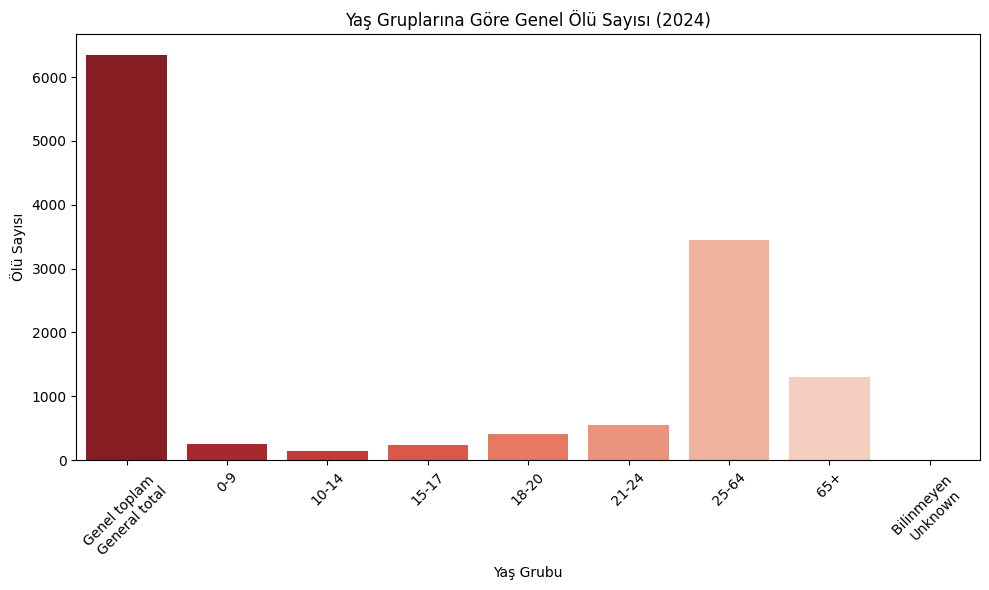

<ipython-input-135-de39d3ae3547>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_data, x="Yaş Grubu", y="Genel_Yaralı_Sayısı", palette="Blues_r")


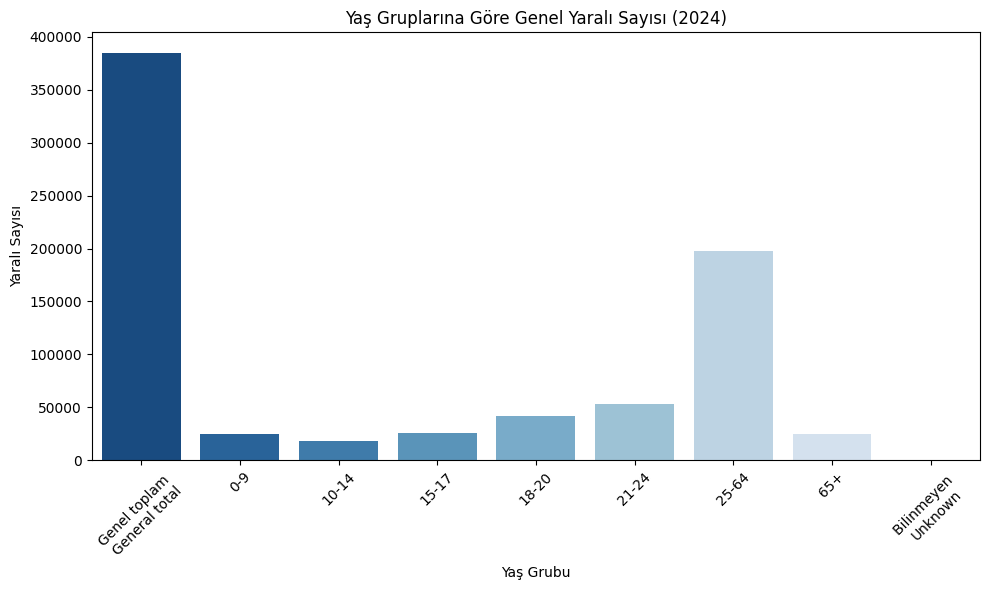

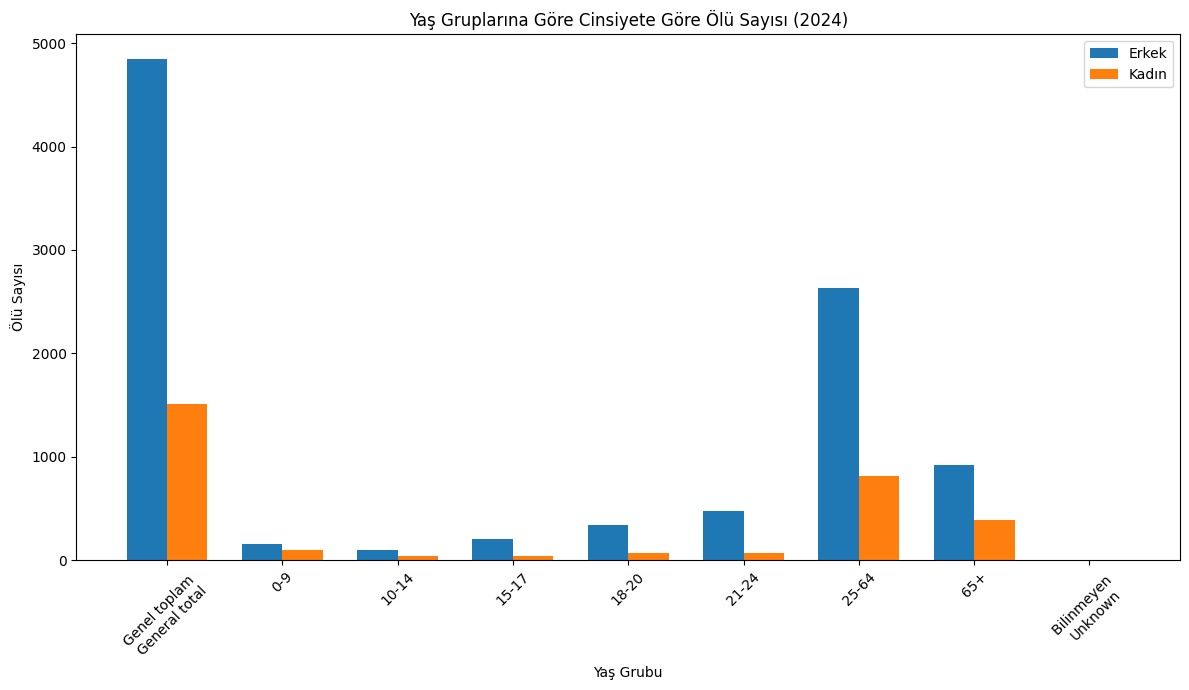

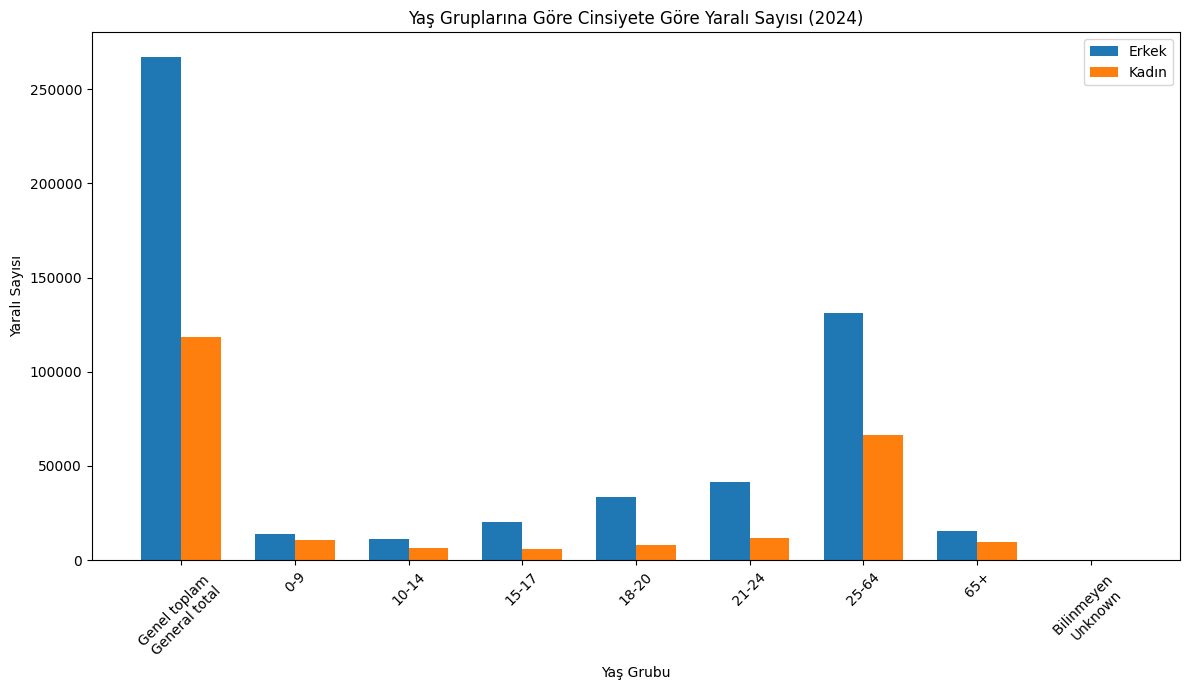

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

bar_width = 0.35
ind = range(len(df_data))

plt.figure(figsize=(10,6))
sns.barplot(data=df_data, x="Yaş Grubu", y="Genel_Ölü_Sayısı", palette="Reds_r")
plt.title("Yaş Gruplarına Göre Genel Ölü Sayısı (2024)")
plt.xlabel("Yaş Grubu")
plt.ylabel("Ölü Sayısı")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10,6))
sns.barplot(data=df_data, x="Yaş Grubu", y="Genel_Yaralı_Sayısı", palette="Blues_r")
plt.title("Yaş Gruplarına Göre Genel Yaralı Sayısı (2024)")
plt.xlabel("Yaş Grubu")
plt.ylabel("Yaralı Sayısı")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(12,7))
plt.bar(ind, df_data["Erkek_Ölü_Sayısı"], width=bar_width, label="Erkek")
plt.bar([i + bar_width for i in ind], df_data["Kadın_Ölü_Sayısı"], width=bar_width, label="Kadın")
plt.xlabel("Yaş Grubu")
plt.ylabel("Ölü Sayısı")
plt.title("Yaş Gruplarına Göre Cinsiyete Göre Ölü Sayısı (2024)")
plt.xticks([i + bar_width / 2 for i in ind], df_data["Yaş Grubu"], rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

plt.figure(figsize=(12,7))
plt.bar(ind, df_data["Erkek_Yaralı_Sayısı"], width=bar_width, label="Erkek")
plt.bar([i + bar_width for i in ind], df_data["Kadın_Yaralı_Sayısı"], width=bar_width, label="Kadın")
plt.xlabel("Yaş Grubu")
plt.ylabel("Yaralı Sayısı")
plt.title("Yaş Gruplarına Göre Cinsiyete Göre Yaralı Sayısı (2024)")
plt.xticks([i + bar_width / 2 for i in ind], df_data["Yaş Grubu"], rotation=45)
plt.legend()
plt.tight_layout()
plt.show()




# tasit cinslerine gore olumlu yaralanmali kazaya karisan tasit olen ve yaralanan surucu **sayisi**

In [ ]:
import pandas as pd
from google.colab import files


df_raw = pd.read_excel("tasit cinslerine gore olumlu yaralanmali kazaya karisan tasit olen ve yaralanan surucu sayisi.xls", header=None)

pd.set_option('display.max_columns', None)
df_raw.head(20)


,0,1,2,3,4,5
0,"Taşıt cinslerine göre ölümlü yaralanmalı kazaya karışan taşıt, ölen ve yaralanan sürücü sayısı, 2024",NaN,NaN,NaN,NaN,NaN
1,"Number of vehicles involved in accidents with death or injury, drivers killed and injured by vehicle type, 2024",NaN,NaN,NaN,NaN,NaN
2,NaN,Ölümlü yaralanmalı,NaN,NaN,NaN,NaN
3,NaN,kazaya karışan,NaN,NaN,NaN,Yaralanan sürücü
4,NaN,taşıt sayısı,NaN,NaN,NaN,sayısı
5,NaN,Number of vehicles,Ölen sürücü sayısı - Number of drivers killed,NaN,NaN,Number of
6,Taşıt cinsi,involved in accidents,Toplam,Kaza yerinde,Kaza sonrası(1),drivers
7,Vehicle type,with death or injury,Total,At accident scene,Accident follow-up(1),injured
8,Toplam - Total,392740,3074,1370,1704,202905
9,Otomobil - Car,164074,1083,588,495,59390


In [ ]:
import pandas as pd
from google.colab import files



# 2️⃣ Ham veriyi başlıksız olarak oku
df_raw = pd.read_excel("tasit cinslerine gore olumlu yaralanmali kazaya karisan tasit olen ve yaralanan surucu sayisi.xls", header=None)

# 3️⃣ Veriyi 9. satırdan (index=8) başlayarak al
df_data = df_raw.iloc[8:].reset_index(drop=True)

# 4️⃣ Sütunları isimlendir
df_data.columns = [
    "Taşıt Cinsi",
    "Kazaya Karışan Taşıt Sayısı",
    "Ölen Sürücü Sayısı (Toplam)",
    "Ölen Sürücü Sayısı (Kaza Yerinde)",
    "Ölen Sürücü Sayısı (Kaza Sonrası)",
    "Yaralanan Sürücü Sayısı"
]

# 5️⃣ Nan ve boş satırları temizle (Taşıt Cinsi boş olan ve sayısal sütunlarda tamamen NaN olanlar atılır)
df_data = df_data[df_data["Taşıt Cinsi"].notna()]
df_data = df_data.dropna(subset=["Kazaya Karışan Taşıt Sayısı", "Ölen Sürücü Sayısı (Toplam)", "Yaralanan Sürücü Sayısı"], how='all')

# 6️⃣ Sayısal sütunları dönüştür
for col in df_data.columns[1:]:
    df_data[col] = pd.to_numeric(df_data[col], errors="coerce")

# 7️⃣ İndeksi sıfırla
df_data.reset_index(drop=True, inplace=True)

# 8️⃣ Sonucu göster
df_data



,Taşıt Cinsi,Kazaya Karışan Taşıt Sayısı,Ölen Sürücü Sayısı (Toplam),Ölen Sürücü Sayısı (Kaza Yerinde),Ölen Sürücü Sayısı (Kaza Sonrası),Yaralanan Sürücü Sayısı
0,Toplam - Total,392740,3074,1370,1704,202905
1,Otomobil - Car,164074,1083,588,495,59390
2,Minibüs - Minibus,9202,18,10,8,1235
3,Otobüs - Bus,7016,19,9,10,487
4,Kamyonet - Small truck,53821,257,141,116,14578
5,Kamyon - Truck,6678,63,42,21,1827
6,Çekici - Road tractor,7837,106,87,19,2445
7,Motosiklet - Motorcycle,123676,1229,379,850,109832
8,Traktör - Tractor,3048,139,70,69,1467
9,Özel amaçlı - Special purpose,794,8,4,4,202


# **Keşifsel veri analizi**

<ipython-input-112-50e9635c79b8>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_data, x="Taşıt Cinsi", y="Kazaya Karışan Taşıt Sayısı", palette="Blues_d")


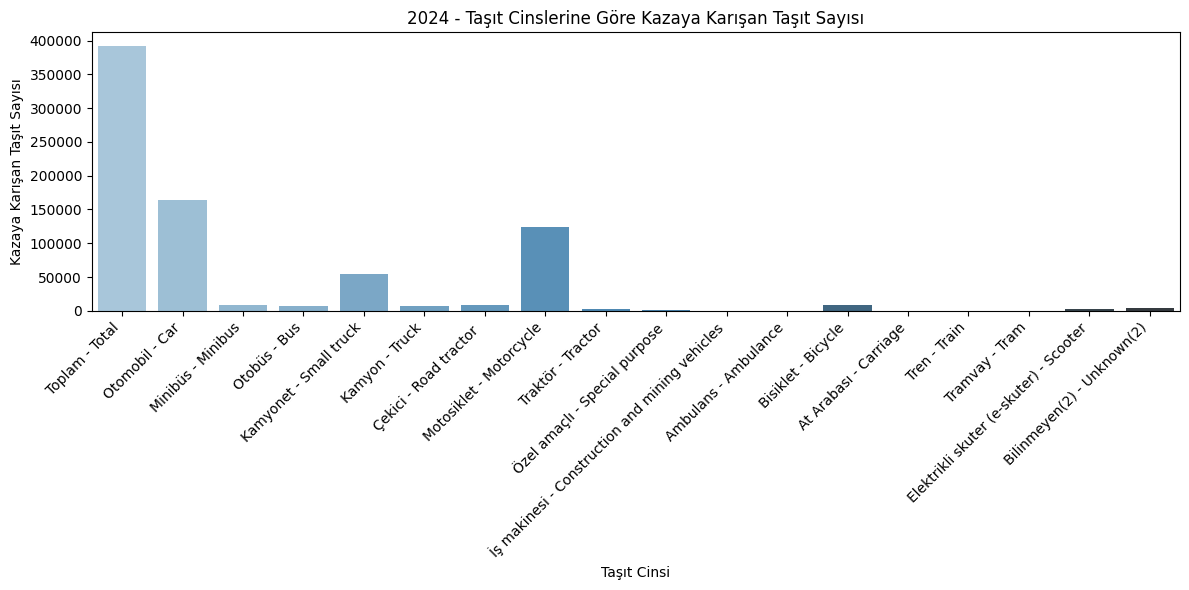

<ipython-input-112-50e9635c79b8>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_data, x="Taşıt Cinsi", y="Ölen Sürücü Sayısı (Toplam)", palette="Reds_r")


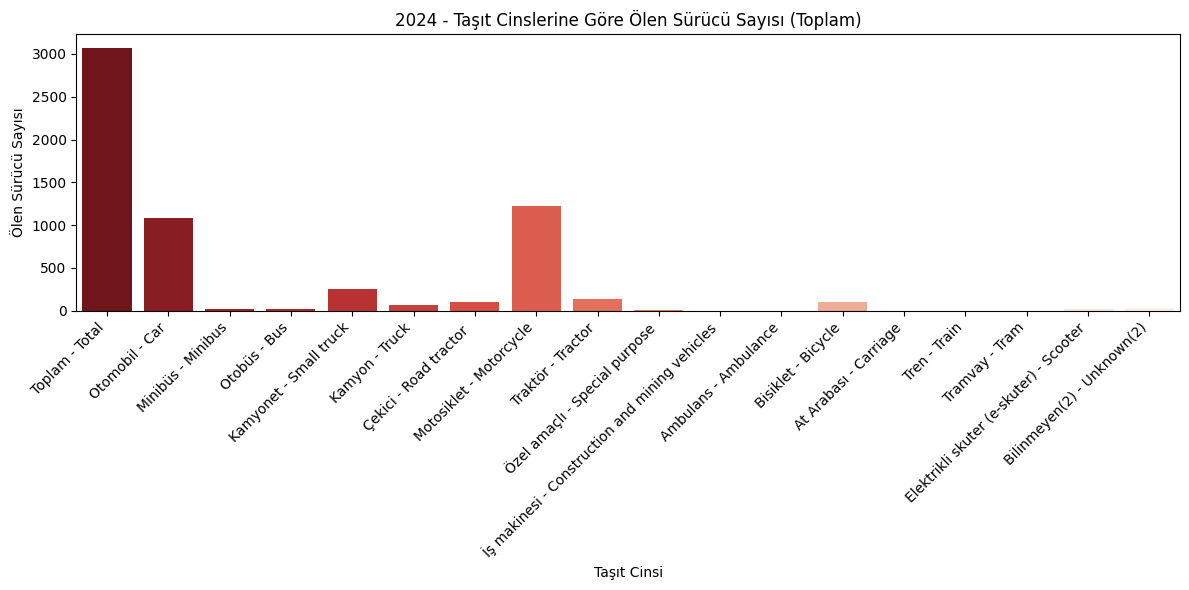

<ipython-input-112-50e9635c79b8>:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_data, x="Taşıt Cinsi", y="Yaralanan Sürücü Sayısı", palette="Greens_d")


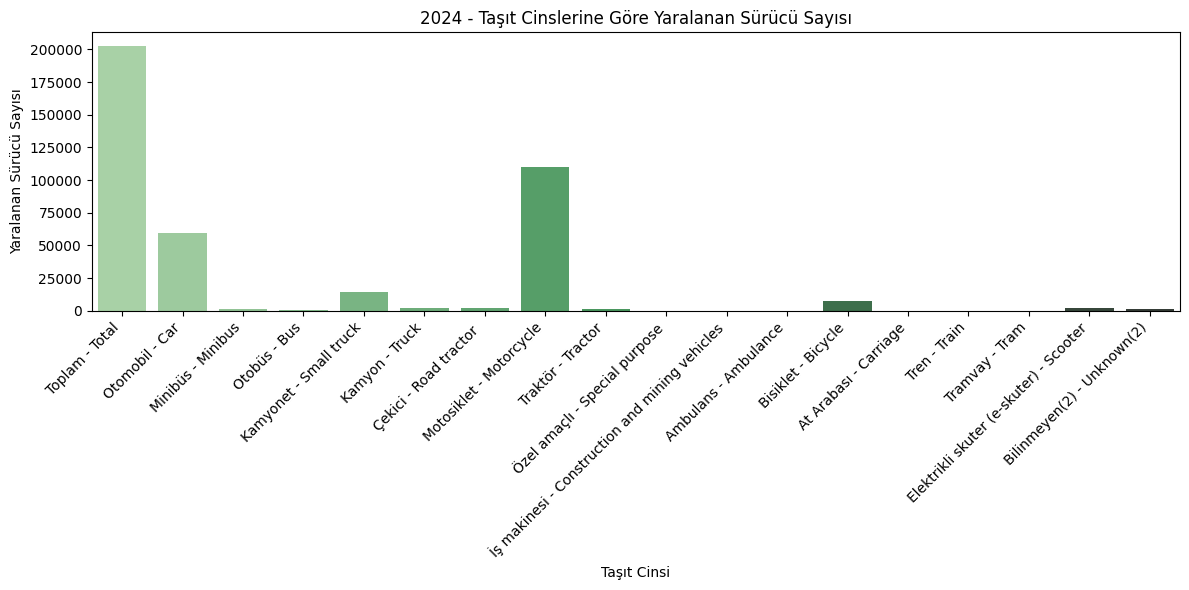

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1️⃣ Taşıt cinslerine göre kazaya karışan taşıt sayısı
plt.figure(figsize=(12,6))
sns.barplot(data=df_data, x="Taşıt Cinsi", y="Kazaya Karışan Taşıt Sayısı", palette="Blues_d")
plt.title("2024 - Taşıt Cinslerine Göre Kazaya Karışan Taşıt Sayısı")
plt.xlabel("Taşıt Cinsi")
plt.ylabel("Kazaya Karışan Taşıt Sayısı")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# 2️⃣ Taşıt cinslerine göre ölen sürücü sayısı (toplam)
plt.figure(figsize=(12,6))
sns.barplot(data=df_data, x="Taşıt Cinsi", y="Ölen Sürücü Sayısı (Toplam)", palette="Reds_r")
plt.title("2024 - Taşıt Cinslerine Göre Ölen Sürücü Sayısı (Toplam)")
plt.xlabel("Taşıt Cinsi")
plt.ylabel("Ölen Sürücü Sayısı")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# 3️⃣ Taşıt cinslerine göre yaralanan sürücü sayısı
plt.figure(figsize=(12,6))
sns.barplot(data=df_data, x="Taşıt Cinsi", y="Yaralanan Sürücü Sayısı", palette="Greens_d")
plt.title("2024 - Taşıt Cinslerine Göre Yaralanan Sürücü Sayısı")
plt.xlabel("Taşıt Cinsi")
plt.ylabel("Yaralanan Sürücü Sayısı")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


# **aylara gore olumlu yaralanmali kaza olu ve yarali sayisi

In [ ]:
import pandas as pd
from google.colab import files


df_raw = pd.read_excel("aylara gore olumlu yaralanmali kaza olu ve yarali sayisi.xls", header=None)

pd.set_option('display.max_columns', None)
df_raw.head(20)


,0,1,2,3,4,5
0,"Aylara göre ölümlü yaralanmalı kaza, ölü ve yaralı sayısı, 2024",NaN,NaN,NaN,NaN,NaN
1,"Number of road traffic accidents involving death or injury, persons killed and injured by months, 2024",NaN,NaN,NaN,NaN,NaN
2,NaN,Ölümlü yaralanmalı kaza sayısı,Ölü sayısı - Number of persons killed,NaN,NaN,Yaralı sayısı
3,Ay,Number of accidents involving death or injury,Toplam,Kaza yerinde,Kaza sonrası(1),Number of persons injured
4,Month,NaN,Total,At accident scene,Accident follow-up(1),NaN
5,Toplam - Total,266855,6352,2713,3639,385117
6,Ocak - January,16244,409,195,214,23345
7,Şubat - February,16420,377,158,219,22798
8,Mart - March,18940,438,200,238,26825
9,Nisan - April,22642,568,237,331,33398


In [ ]:
import pandas as pd
from google.colab import files

# 2️⃣ Ham veriyi başlıksız olarak oku
df_raw = pd.read_excel("aylara gore olumlu yaralanmali kaza olu ve yarali sayisi.xls", header=None)

# 3️⃣ Veri 6. satırdan (index=5) itibaren başlıyor
df_data = df_raw.iloc[5:18].reset_index(drop=True)

# 4️⃣ Sütun isimlendirmesi yap
df_data.columns = [
    "Ay",
    "Ölümlü Yaralanmalı Kaza Sayısı",
    "Toplam Ölü Sayısı",
    "Ölü Sayısı (Kaza Yerinde)",
    "Ölü Sayısı (Kaza Sonrası)",
    "Yaralı Sayısı"
]

# 5️⃣ Gereksiz açıklama satırlarını çıkar (burada 18. satır sonrası zaten atıldı)
# 6️⃣ Sayısal sütunları dönüştür
for col in df_data.columns[1:]:
    df_data[col] = pd.to_numeric(df_data[col], errors="coerce")

# 7️⃣ İndeksi sıfırla
df_data.reset_index(drop=True, inplace=True)

# 8️⃣ Temiz veri hazır, ilk 12 satırı göster
df_data.head(13)


,Ay,Ölümlü Yaralanmalı Kaza Sayısı,Toplam Ölü Sayısı,Ölü Sayısı (Kaza Yerinde),Ölü Sayısı (Kaza Sonrası),Yaralı Sayısı
0,Toplam - Total,266855,6352,2713,3639,385117
1,Ocak - January,16244,409,195,214,23345
2,Şubat - February,16420,377,158,219,22798
3,Mart - March,18940,438,200,238,26825
4,Nisan - April,22642,568,237,331,33398
5,Mayıs - May,22345,539,242,297,31193
6,Haziran - June,25240,614,237,377,38331
7,Temmuz - July,25414,650,262,388,37759
8,Ağustos - August,26757,695,303,392,40101
9,Eylül - September,26080,624,240,384,37701


# Keşifsel veri analizi

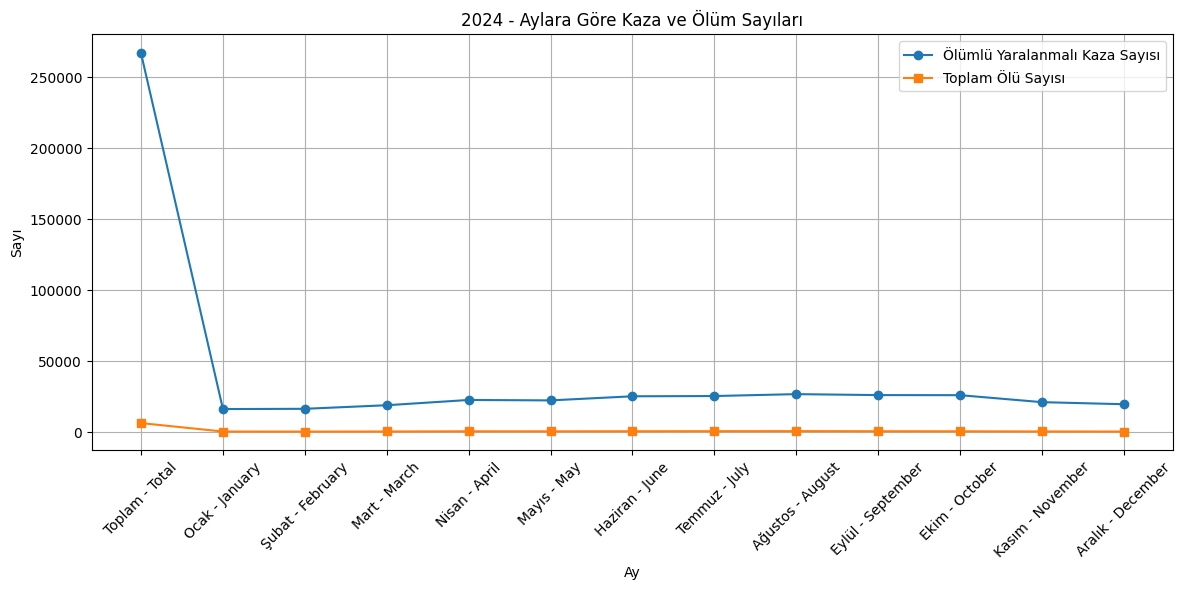

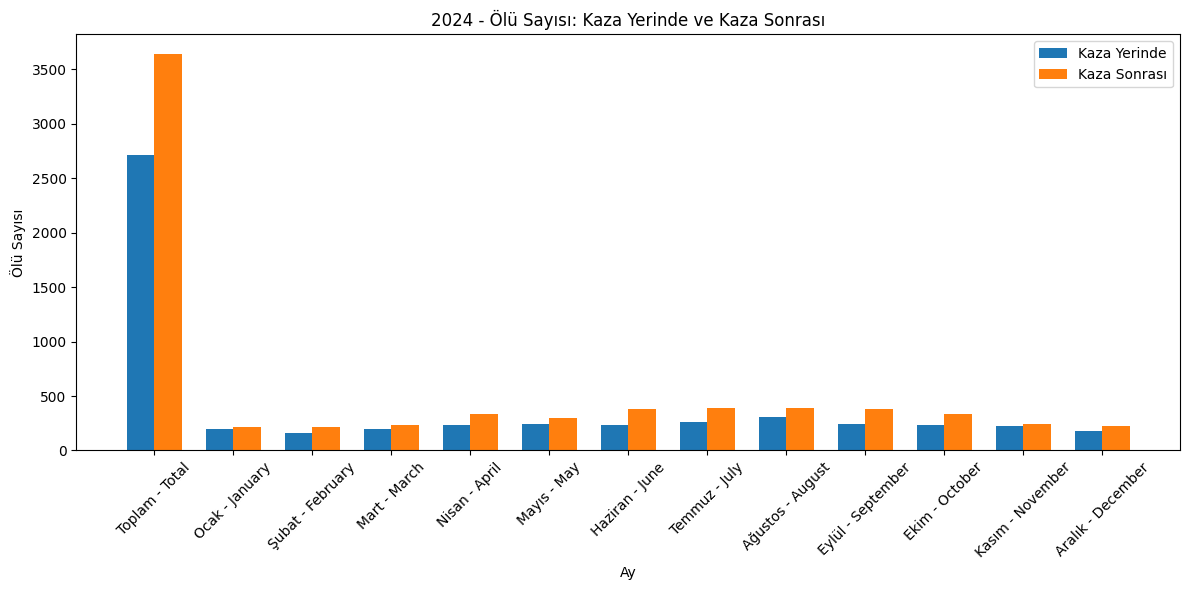

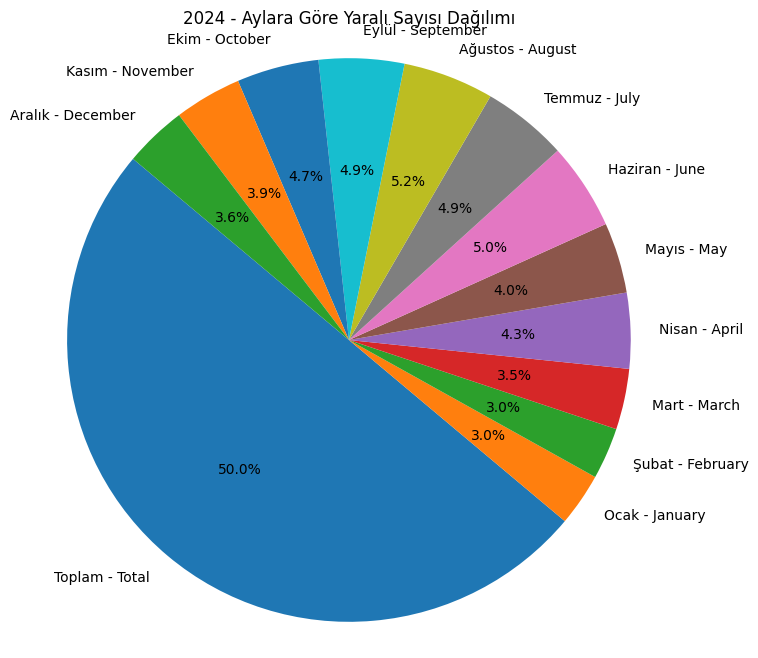

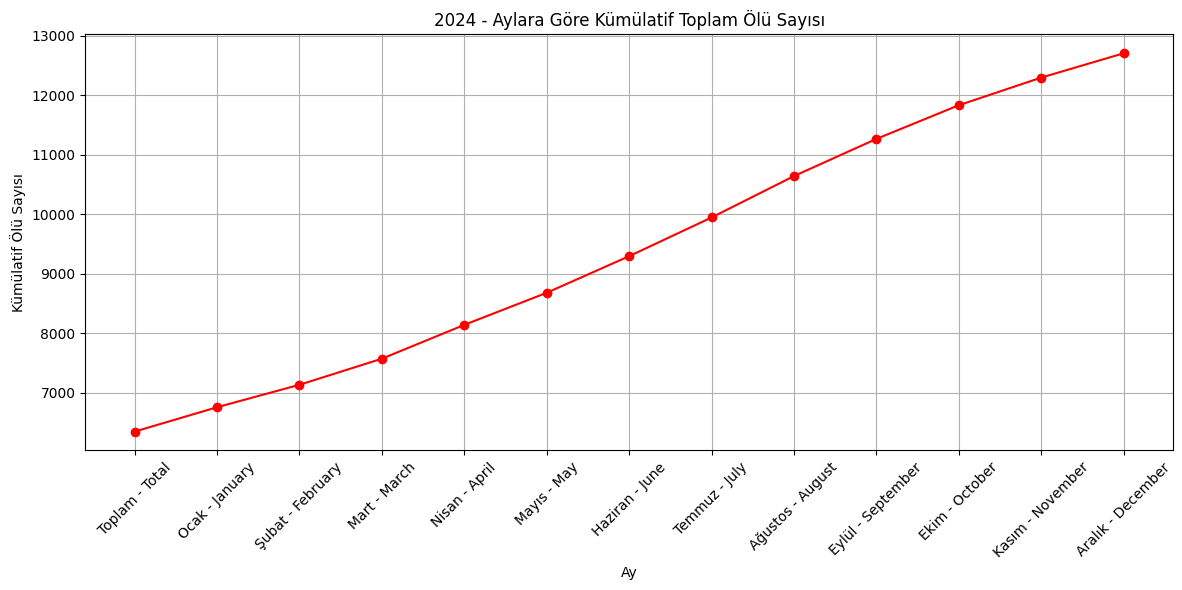

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# 1️⃣ Ölümlü Yaralanmalı Kaza Sayısı ve Toplam Ölü Sayısı - Çizgi Grafiği
plt.figure(figsize=(12,6))
plt.plot(df_data["Ay"], df_data["Ölümlü Yaralanmalı Kaza Sayısı"], marker='o', label="Ölümlü Yaralanmalı Kaza Sayısı")
plt.plot(df_data["Ay"], df_data["Toplam Ölü Sayısı"], marker='s', label="Toplam Ölü Sayısı")
plt.title("2024 - Aylara Göre Kaza ve Ölüm Sayıları")
plt.xlabel("Ay")
plt.ylabel("Sayı")
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# 2️⃣ Ölü Sayısı (Kaza Yerinde vs Kaza Sonrası) - Karşılaştırmalı Çubuk Grafik
labels = df_data["Ay"]
x = np.arange(len(labels))
width = 0.35

plt.figure(figsize=(12,6))
plt.bar(x - width/2, df_data["Ölü Sayısı (Kaza Yerinde)"], width, label="Kaza Yerinde")
plt.bar(x + width/2, df_data["Ölü Sayısı (Kaza Sonrası)"], width, label="Kaza Sonrası")
plt.xticks(x, labels, rotation=45)
plt.xlabel("Ay")
plt.ylabel("Ölü Sayısı")
plt.title("2024 - Ölü Sayısı: Kaza Yerinde ve Kaza Sonrası")
plt.legend()
plt.tight_layout()
plt.show()

# 3️⃣ Yaralı Sayısı - Pasta Grafiği
plt.figure(figsize=(8,8))
plt.pie(df_data["Yaralı Sayısı"], labels=df_data["Ay"], autopct='%1.1f%%', startangle=140)
plt.title("2024 - Aylara Göre Yaralı Sayısı Dağılımı")
plt.axis('equal')
plt.show()

# 4️⃣ Kümülatif Toplam Ölü Sayısı - Çizgi Grafiği
df_data_sorted = df_data.copy()
df_data_sorted["Kümülatif Ölü Sayısı"] = df_data_sorted["Toplam Ölü Sayısı"].cumsum()

plt.figure(figsize=(12,6))
plt.plot(df_data_sorted["Ay"], df_data_sorted["Kümülatif Ölü Sayısı"], marker='o', color='red')
plt.title("2024 - Aylara Göre Kümülatif Toplam Ölü Sayısı")
plt.xlabel("Ay")
plt.ylabel("Kümülatif Ölü Sayısı")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()




=== Ölü (Toplam) Tahmini ===
MAE: 19.26
MSE: 1710.04
RMSE: 41.35
R2 Score: 0.7365


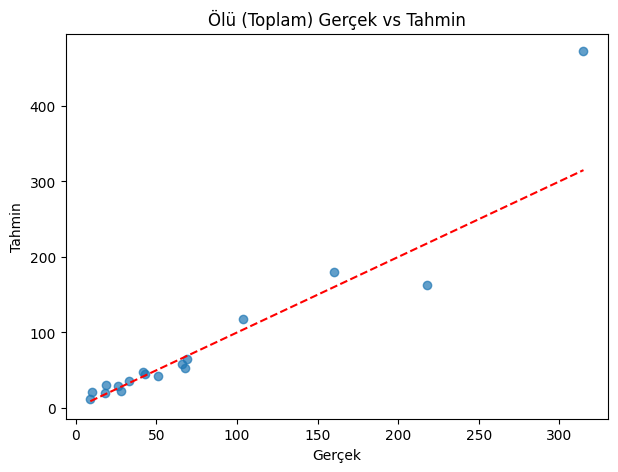


=== Yaralı Tahmini ===
MAE: 629.81
MSE: 767259.33
RMSE: 875.93
R2 Score: 0.9914


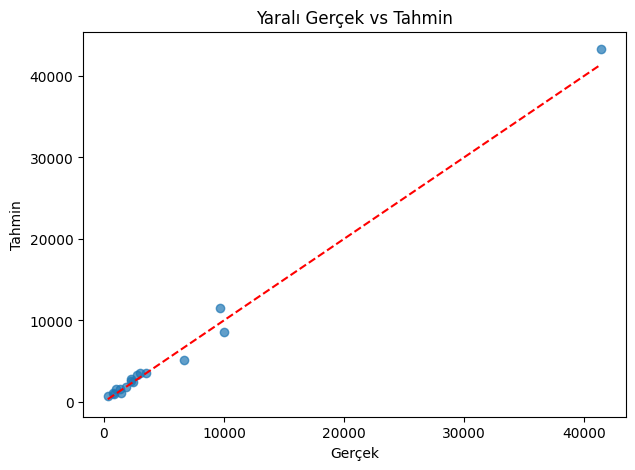

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# 1️⃣ Veri Yükleme ve Temizleme
df_raw = pd.read_excel("illere gore trafik kaza olu ve yarali sayisi.xls", header=None)
df_data = df_raw.iloc[4:].reset_index(drop=True)

left = df_data.iloc[:, 0:8]
left.columns = ["İl", "Toplam_Kaza", "Araç_Sayısı", "ÖY_Kaza", "Ölü_Toplam", "Ölü_Yerde", "Ölü_Sonrası", "Yaralı"]

right = df_data.iloc[:, 10:18]
right.columns = ["İl", "Toplam_Kaza", "Araç_Sayısı", "ÖY_Kaza", "Ölü_Toplam", "Ölü_Yerde", "Ölü_Sonrası", "Yaralı"]

df_clean = pd.concat([left, right], axis=0)
df_clean = df_clean[df_clean["İl"].notna()]
df_clean = df_clean[~df_clean["İl"].str.contains("Toplam|TÜİK|TurkStat|kaza|accident|trafik", case=False, na=False)]
df_clean.reset_index(drop=True, inplace=True)

for col in ["Toplam_Kaza", "Araç_Sayısı", "ÖY_Kaza", "Ölü_Toplam", "Ölü_Yerde", "Ölü_Sonrası", "Yaralı"]:
    df_clean[col] = pd.to_numeric(df_clean[col], errors='coerce')

# 2️⃣ Model Fonksiyonu
def regression_model(X, y, target_name):
    mask = ~X.isnull().any(axis=1) & ~y.isnull()
    X_clean = X[mask]
    y_clean = y[mask]

    X_train, X_test, y_train, y_test = train_test_split(X_clean, y_clean, test_size=0.2, random_state=42)

    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    print(f"\n=== {target_name} Tahmini ===")
    print(f"MAE: {mae:.2f}")
    print(f"MSE: {mse:.2f}")
    print(f"RMSE: {rmse:.2f}")
    print(f"R2 Score: {r2:.4f}")

    plt.figure(figsize=(7,5))
    plt.scatter(y_test, y_pred, alpha=0.7)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
    plt.xlabel("Gerçek")
    plt.ylabel("Tahmin")
    plt.title(f"{target_name} Gerçek vs Tahmin")
    plt.show()

# 3️⃣ Ölü Sayısı Tahmini
X_olu = df_clean[["Toplam_Kaza", "Araç_Sayısı", "Yaralı"]]
y_olu = df_clean["Ölü_Toplam"]
regression_model(X_olu, y_olu, "Ölü (Toplam)")

# 4️⃣ Yaralı Sayısı Tahmini
X_yarali = df_clean[["Toplam_Kaza", "Araç_Sayısı", "Ölü_Toplam"]]
y_yarali = df_clean["Yaralı"]
regression_model(X_yarali, y_yarali, "Yaralı")



Doğrusal Regresyon Performansı:
MAE: 19.26
MSE: 1710.04
RMSE: 41.35
R2 Score: 0.7365

Random Forest (Grid Search ile) Performansı:
MAE: 9.97
MSE: 252.23
RMSE: 15.88
R2 Score: 0.9611


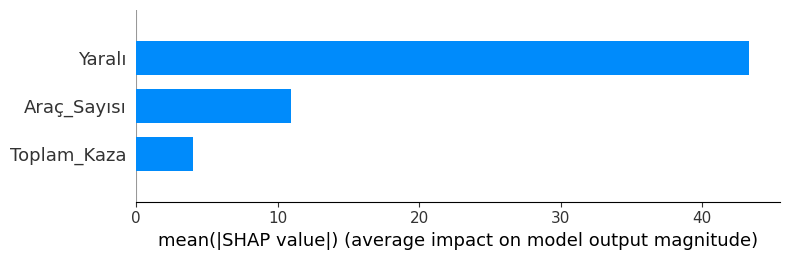

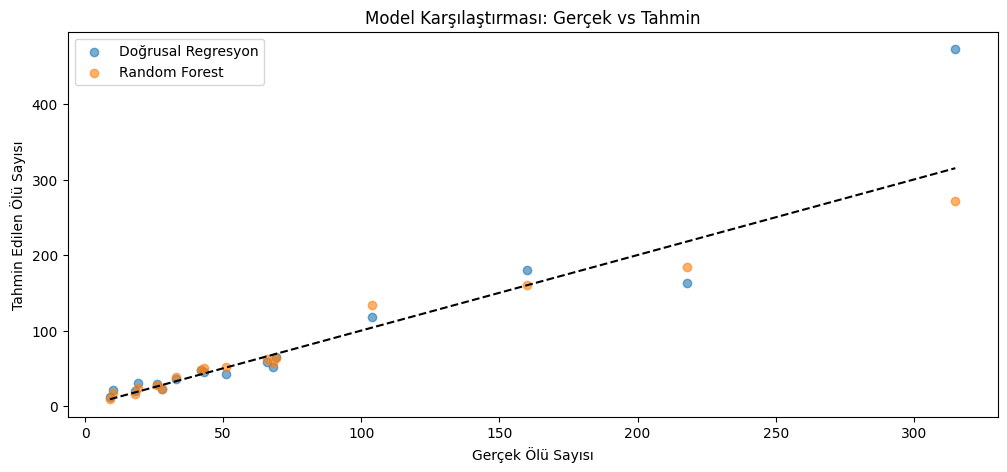

In [ ]:
# Gerekli kütüphaneler
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import shap

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Veri temizleme kodu (öncekiyle aynı)
df_raw = pd.read_excel("illere gore trafik kaza olu ve yarali sayisi.xls", header=None)
df_data = df_raw.iloc[4:].reset_index(drop=True)

left = df_data.iloc[:, 0:8]
left.columns = ["İl", "Toplam_Kaza", "Araç_Sayısı", "ÖY_Kaza", "Ölü_Toplam", "Ölü_Yerde", "Ölü_Sonrası", "Yaralı"]

right = df_data.iloc[:, 10:18]
right.columns = ["İl", "Toplam_Kaza", "Araç_Sayısı", "ÖY_Kaza", "Ölü_Toplam", "Ölü_Yerde", "Ölü_Sonrası", "Yaralı"]

df_clean = pd.concat([left, right], axis=0)
df_clean = df_clean[df_clean["İl"].notna()]
df_clean = df_clean[~df_clean["İl"].str.contains("Toplam|TÜİK|TurkStat|kaza|accident|trafik", case=False, na=False)]
df_clean.reset_index(drop=True, inplace=True)

for col in ["Toplam_Kaza", "Araç_Sayısı", "ÖY_Kaza", "Ölü_Toplam", "Ölü_Yerde", "Ölü_Sonrası", "Yaralı"]:
    df_clean[col] = pd.to_numeric(df_clean[col], errors='coerce')

# Özellik ve hedef seçimi
X = df_clean[["Toplam_Kaza", "Araç_Sayısı", "Yaralı"]].copy()
y = df_clean["Ölü_Toplam"].copy()

# Eksik veri temizliği
mask = ~X.isnull().any(axis=1) & ~y.isnull()
X = X[mask]
y = y[mask]

# Eğitim-test ayırma
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 1) Basit Lineer Regresyon Modeli
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

# 2) Random Forest Modeli ve Hiperparametre Araması
rf = RandomForestRegressor(random_state=42)

param_grid = {
    "n_estimators": [50, 100, 200],
    "max_depth": [None, 5, 10],
    "min_samples_split": [2, 5],
}

grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='r2', n_jobs=-1)
grid_search.fit(X_train, y_train)

best_rf = grid_search.best_estimator_
y_pred_rf = best_rf.predict(X_test)

# Performans fonksiyonu
def print_metrics(y_true, y_pred, model_name):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    print(f"\n{model_name} Performansı:")
    print(f"MAE: {mae:.2f}")
    print(f"MSE: {mse:.2f}")
    print(f"RMSE: {rmse:.2f}")
    print(f"R2 Score: {r2:.4f}")

# Performanslar
print_metrics(y_test, y_pred_lr, "Doğrusal Regresyon")
print_metrics(y_test, y_pred_rf, "Random Forest (Grid Search ile)")

# SHAP ile model açıklaması (Random Forest için)
explainer = shap.Explainer(best_rf, X_train)
shap_values = explainer(X_test)

shap.summary_plot(shap_values, X_test, plot_type="bar")

# Tahmin sonuçlarını karşılaştıralım
plt.figure(figsize=(12,5))
plt.scatter(y_test, y_pred_lr, alpha=0.6, label='Doğrusal Regresyon')
plt.scatter(y_test, y_pred_rf, alpha=0.6, label='Random Forest')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')
plt.xlabel("Gerçek Ölü Sayısı")
plt.ylabel("Tahmin Edilen Ölü Sayısı")
plt.title("Model Karşılaştırması: Gerçek vs Tahmin")
plt.legend()
plt.show()
